In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [49]:
from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

print(xtrain.shape, ytrain.shape)

(60000, 28, 28) (60000,)


<function matplotlib.pyplot.show>

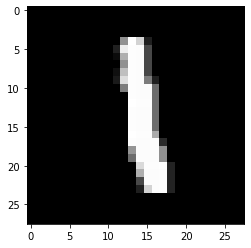

In [50]:
plt.figure()
plt.imshow(xtrain[6], cmap = 'gray')
plt.grid(False)
plt.show

In [51]:
xtrain = xtrain/255.0
xtest = xtest/255.0

xtrain = xtrain.reshape(len(xtrain), 28, 28, 1)
xtest = xtest.reshape(len(xtest), 28, 28, 1)

k = tf.keras 

ytrain = k.utils.to_categorical(ytrain)
ytest = k.utils.to_categorical(ytest)

In [52]:
model = k.Sequential()
model.add(k.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(k.layers.MaxPooling2D((2, 2)))
model.add(k.layers.Flatten())
model.add(k.layers.Dense(100, activation = 'relu'))
model.add(k.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = k.optimizers.SGD(lr = 0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(xtrain, ytrain, epochs=1)

1875/1875 [==============================] - 39s 21ms/step - loss: 0.2404 - accuracy: 0.9267


Predicted:9(0.9987907)


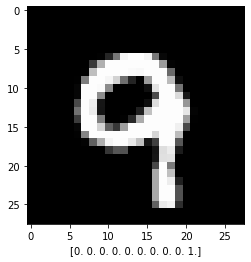

In [58]:
predictions = model.predict(xtest)
imgnum = 99
print('Predicted:' + str(np.argmax(predictions[imgnum])) + '(' + str(np.max(predictions[imgnum])) + ')')
plt.figure()
plt.imshow(xtest[imgnum].reshape(28, 28), cmap = 'gray')
plt.grid(False)
plt.xlabel(str(ytest[imgnum]))
plt.show()